In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# 1. Plotting Waves

In [3]:
#read each csv file in current_directory and store it in dataframes

current_directory = os.getcwd()
csv_files = glob.glob(os.path.join(current_directory, 'ABR_exported_files/*.csv'))

dataframes = {}
for file in csv_files:
    filename = os.path.splitext(os.path.basename(file))[0]
    if pd.read_csv(file).shape[1] > 1:
        dataframes[filename] = pd.read_csv(file)
    else:
        dataframes[filename] = pd.read_csv(file, skiprows=2)

In [4]:
pd.read_csv('ABR_exported_files/A1_1294_24h PSI.csv').shape[1]

1

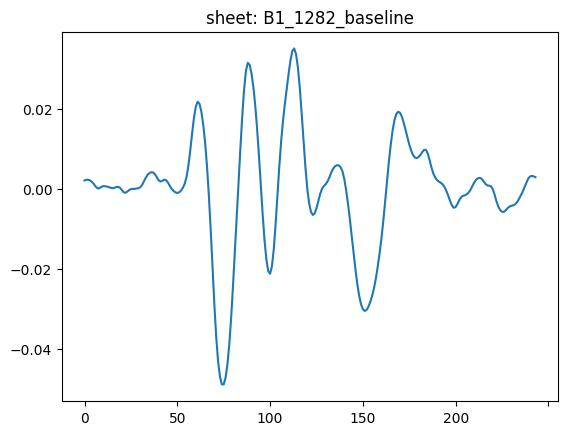

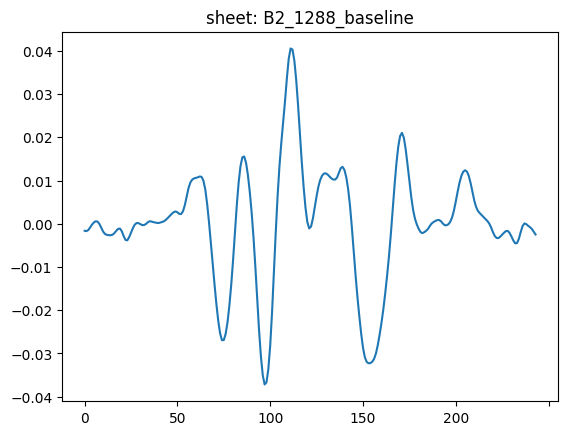

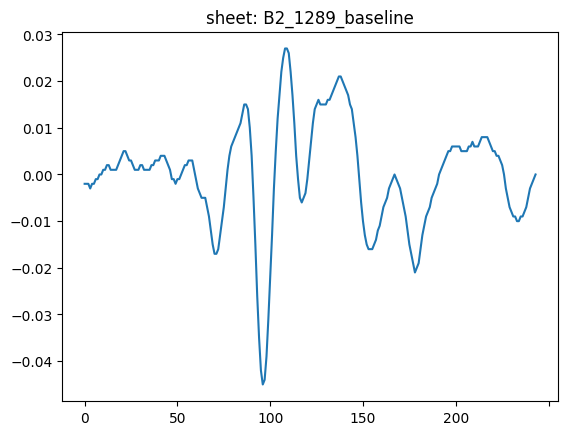

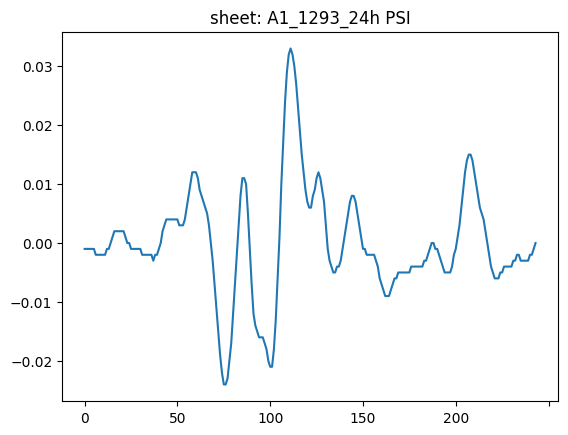

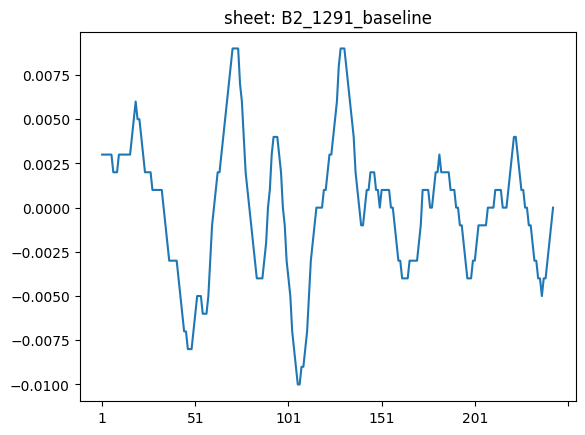

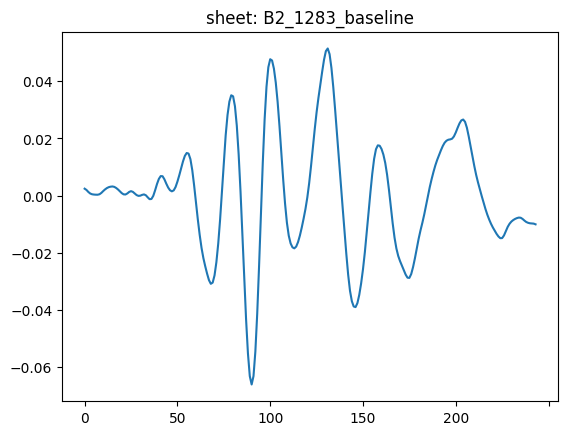

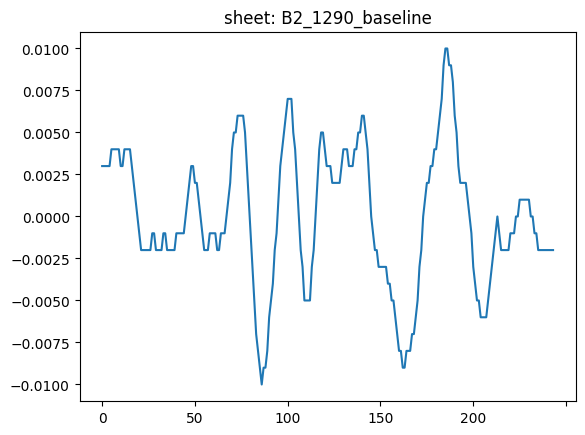

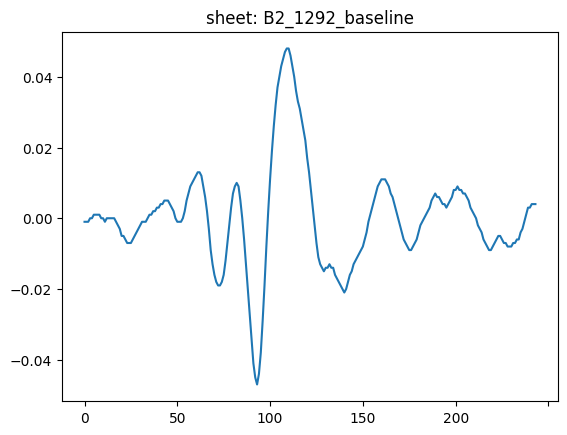

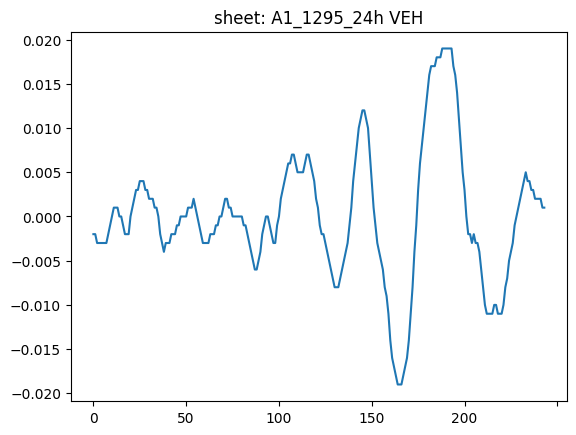

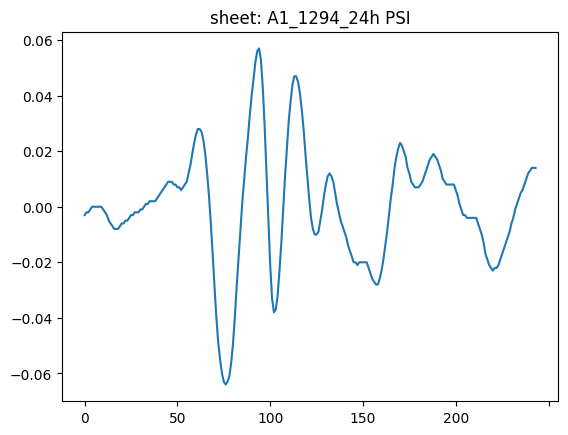

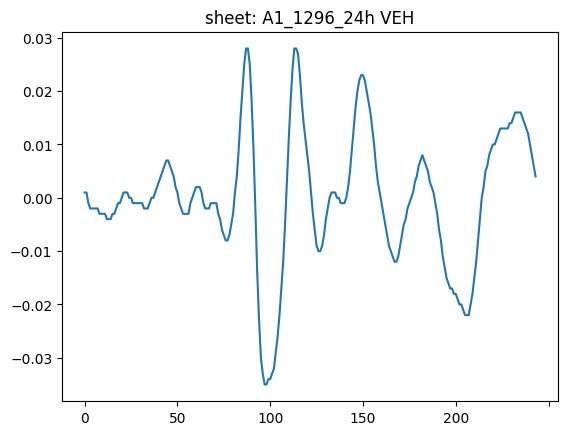

In [5]:
for filename, df in dataframes.items():
    khz = df[df['Freq(Hz)'] == 8000]
    dbkhz = khz[khz['Level(dB)'] == 90]
    index = dbkhz.index.values[0]
    final = df.iloc[index,48:]
    final = pd.to_numeric(final, errors='coerce')
    
    plt.figure()  
    final.plot()
    plt.title(f'sheet: {filename}') 
    plt.show()
    

# 2. Identifying Peaks

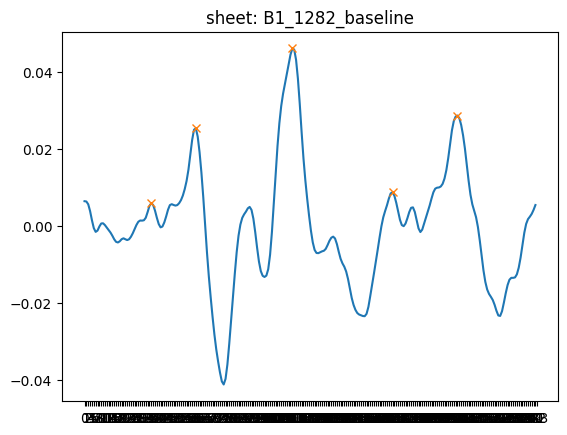

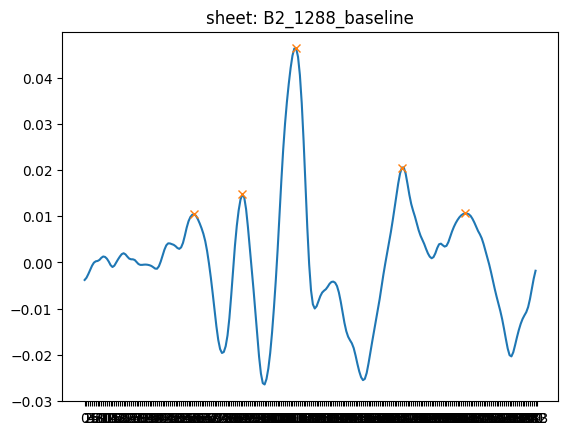

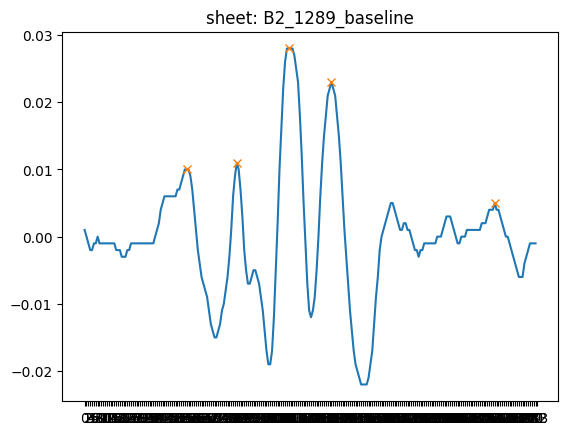

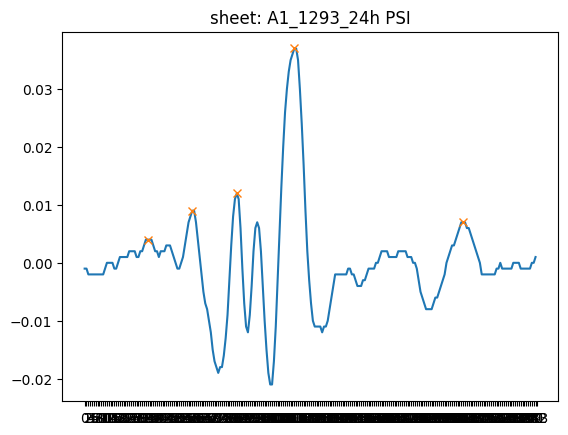

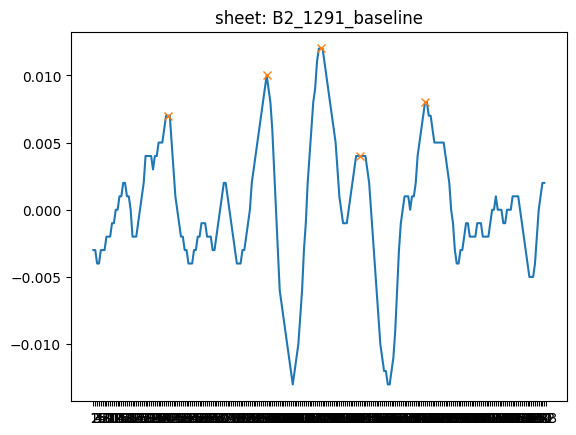

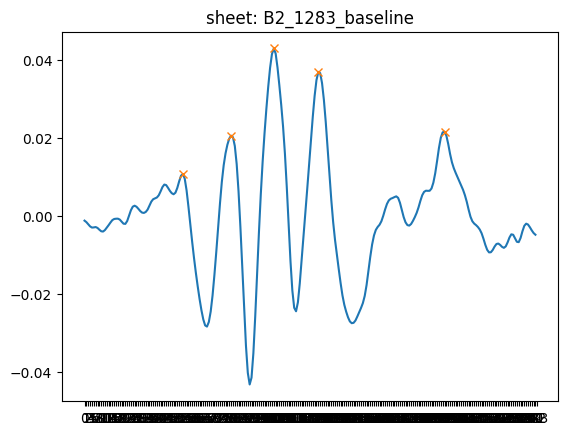

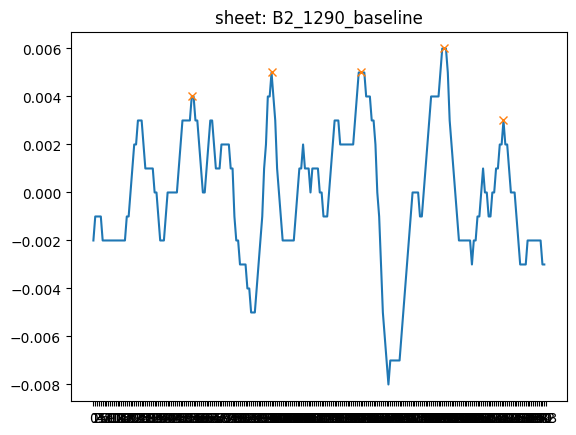

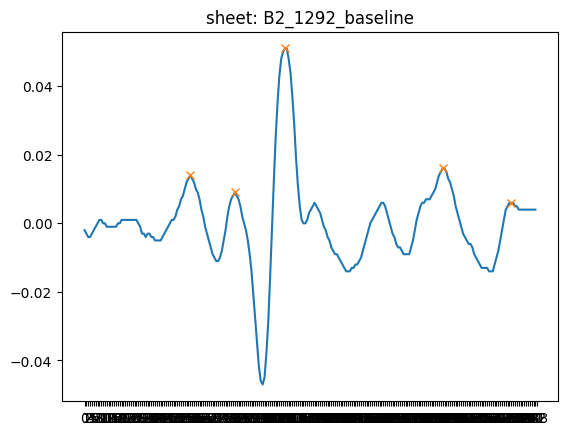

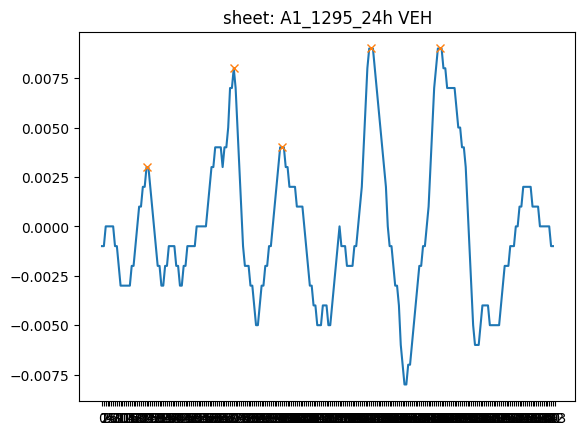

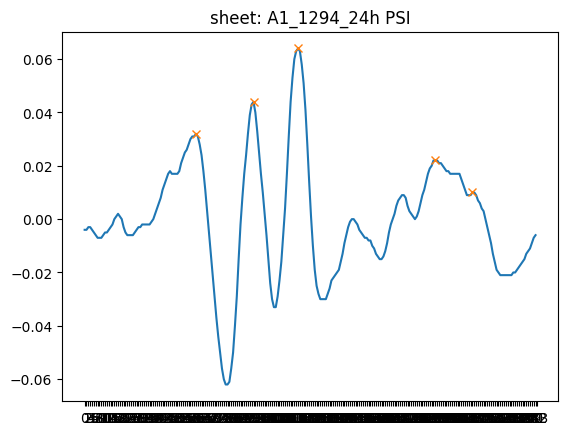

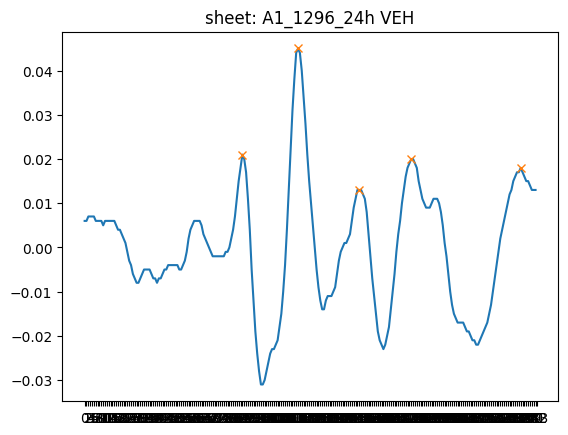

In [6]:
for filename, df in dataframes.items():
    khz = df[df['Freq(Hz)'] == 16000]
    dbkhz = khz[khz['Level(dB)'] == 70]
    index = dbkhz.index.values[0]
    final = df.iloc[index,48:]
    final = pd.to_numeric(final, errors='coerce')

    #find highest peaks separated by atleast n data points
    n = 20
    peaks, _ = find_peaks(final, distance=n)
    highest_peaks = peaks[np.argsort(final[peaks])[-5:]]
    
    plt.figure()
    plt.plot(final)
    plt.plot(highest_peaks, final[highest_peaks], "x")
    plt.title(f'sheet: {filename}')
    plt.show()

In [7]:
def plotting_waves(dataframes=dataframes, freq=16000, db=90):
    for filename, df in dataframes.items():
        khz = df[df['Freq(Hz)'] == freq]
        dbkhz = khz[khz['Level(dB)'] == db]
        index = dbkhz.index.values[0]
        final = df.iloc[index,48:]
        final = pd.to_numeric(final, errors='coerce')

        #find highest peaks separated by atleast n data points
        n = 20
        peaks, _ = find_peaks(final, distance=n)
        highest_peaks = peaks[np.argsort(final[peaks])[-5:]]
    
        plt.figure()
        plt.plot(final)
        plt.plot(highest_peaks, final[highest_peaks], "x")
        plt.title(f'sheet: {filename}')
        plt.show()

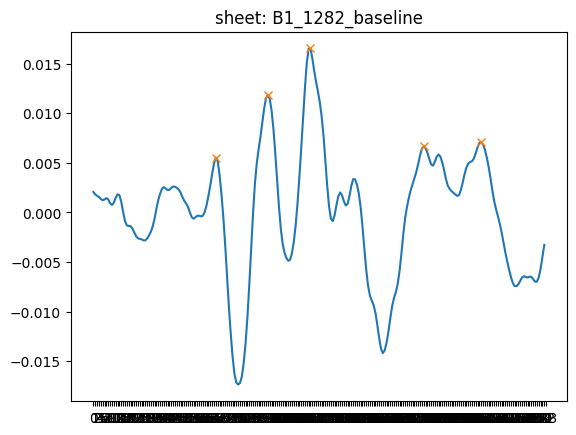

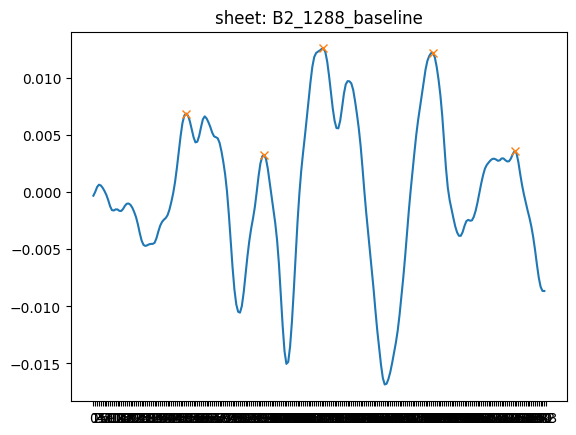

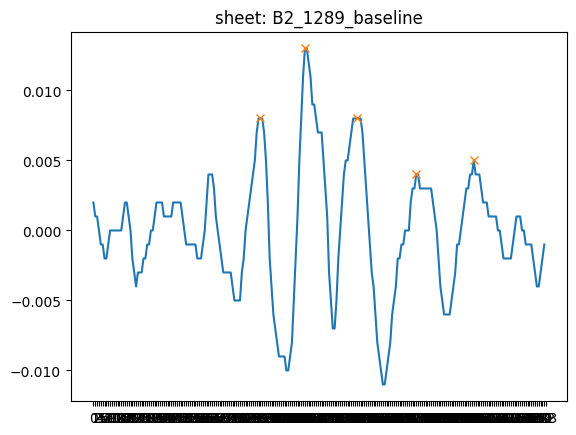

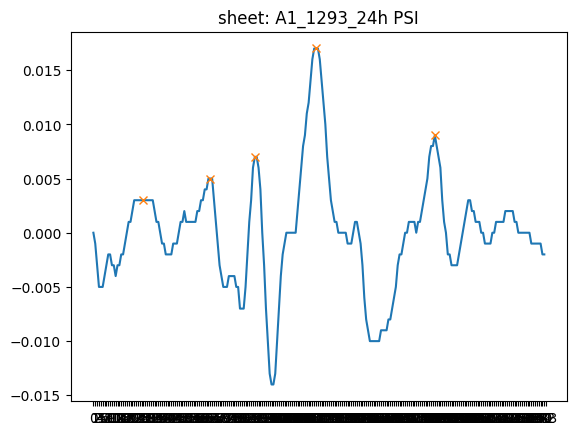

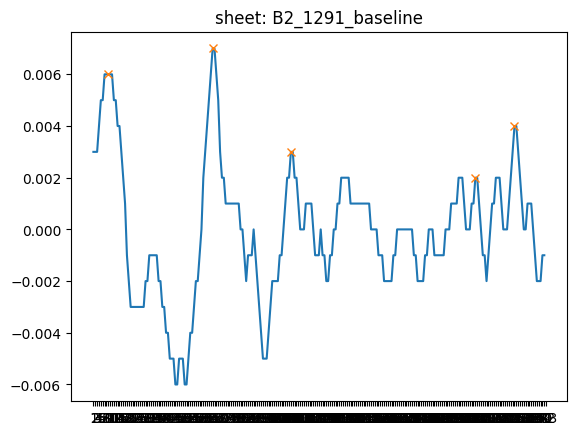

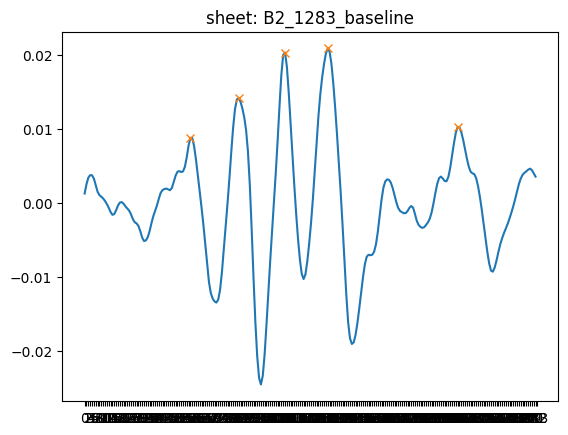

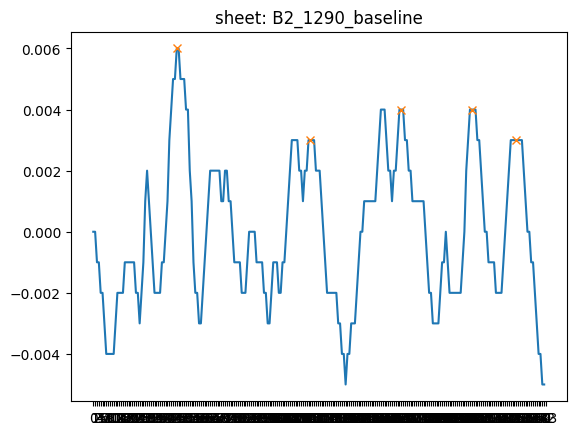

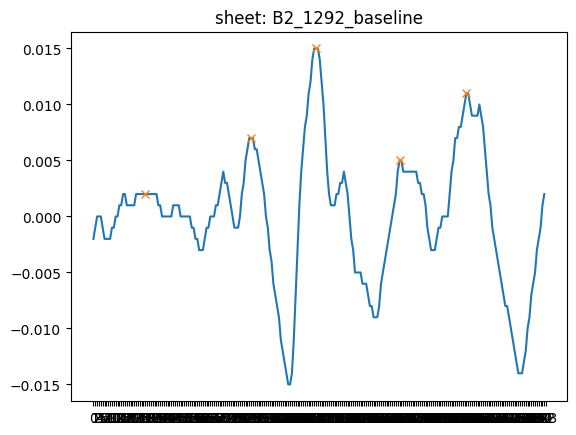

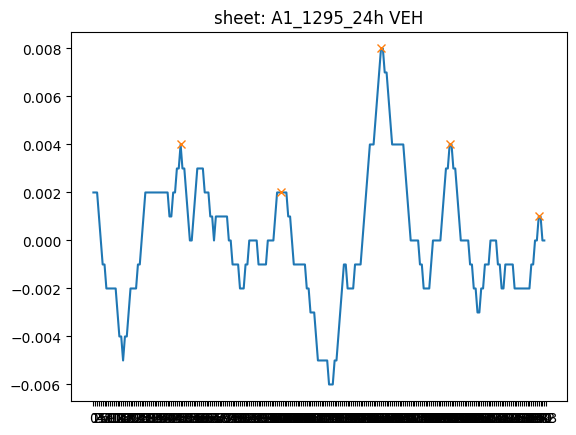

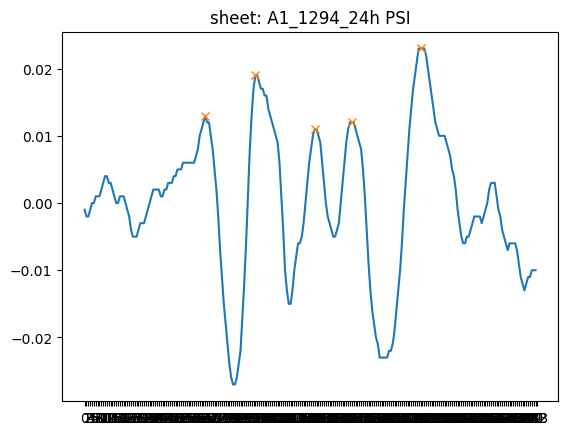

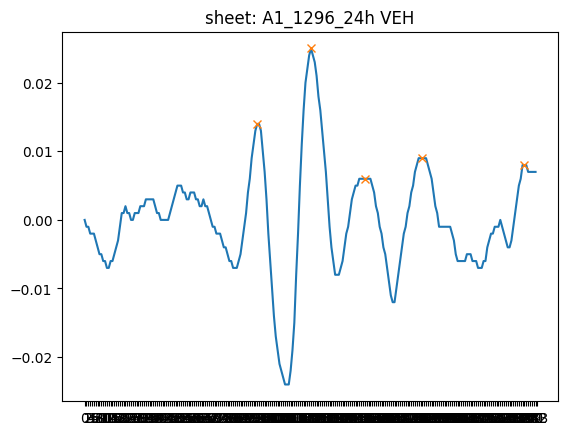

In [8]:
plotting_waves(freq=16000, db=50)

In [9]:
data = pd.read_csv('ABR_exported_files/A1_1293_24h PSI.csv', skiprows=2)
khz = data[data['Freq(Hz)'] == 16000]
dbkhz = khz[khz['Level(dB)'] == 90]
index = dbkhz.index.values[0]
final = data.iloc[index,48:]
final = pd.to_numeric(final, errors='coerce')

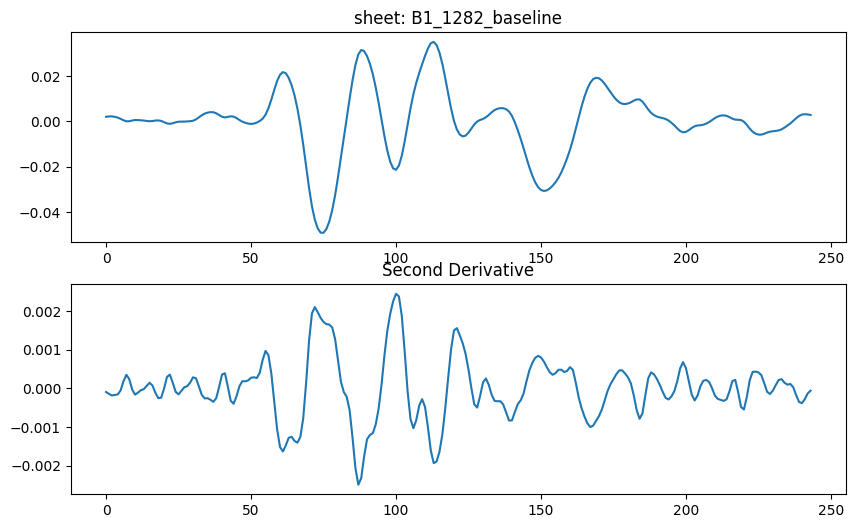

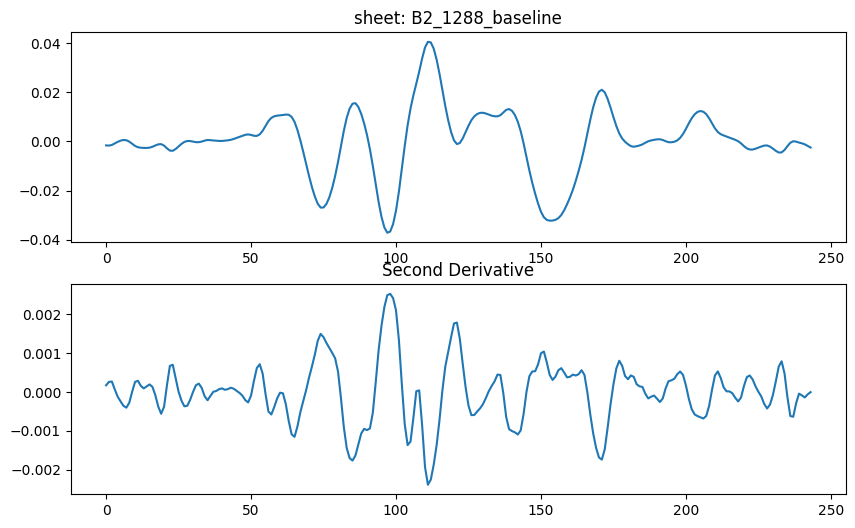

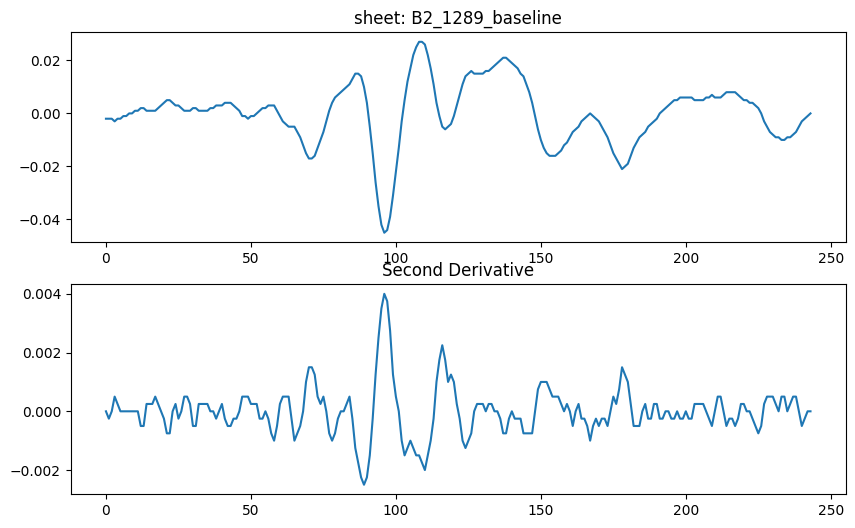

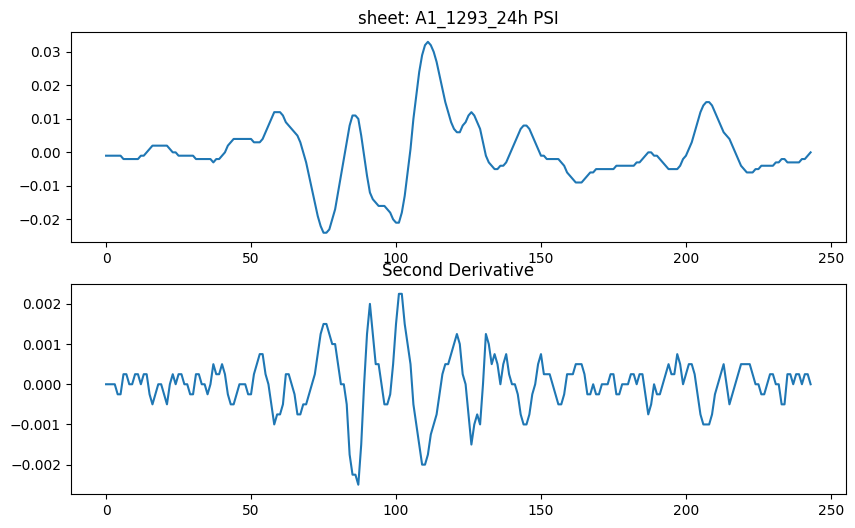

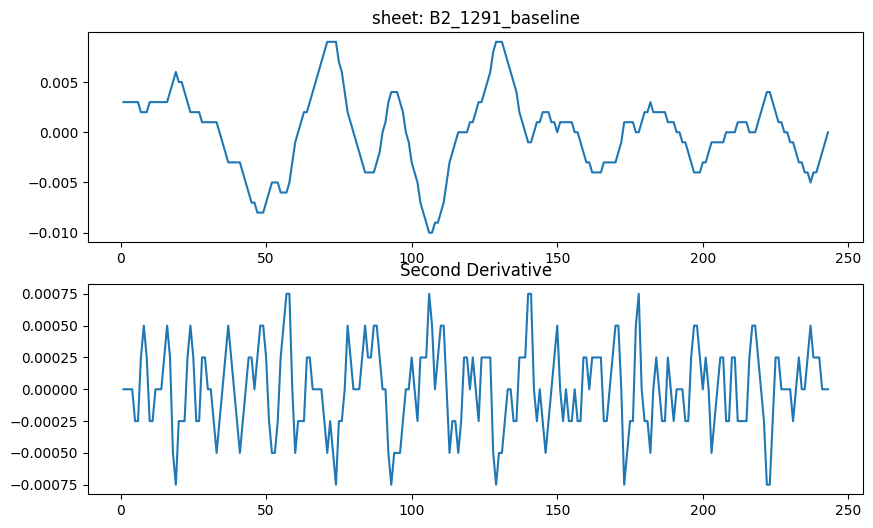

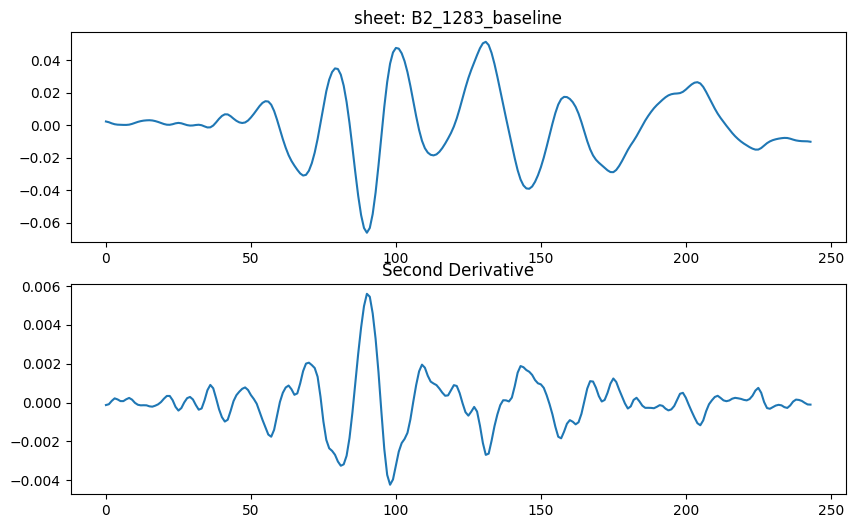

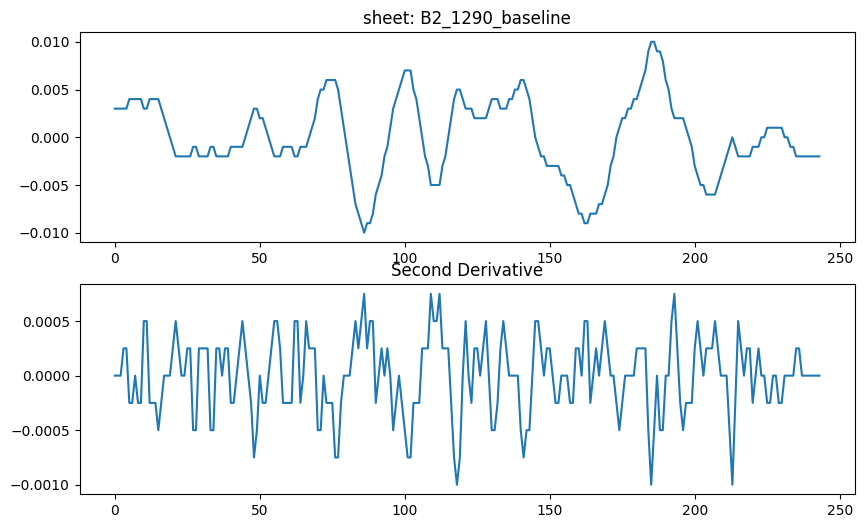

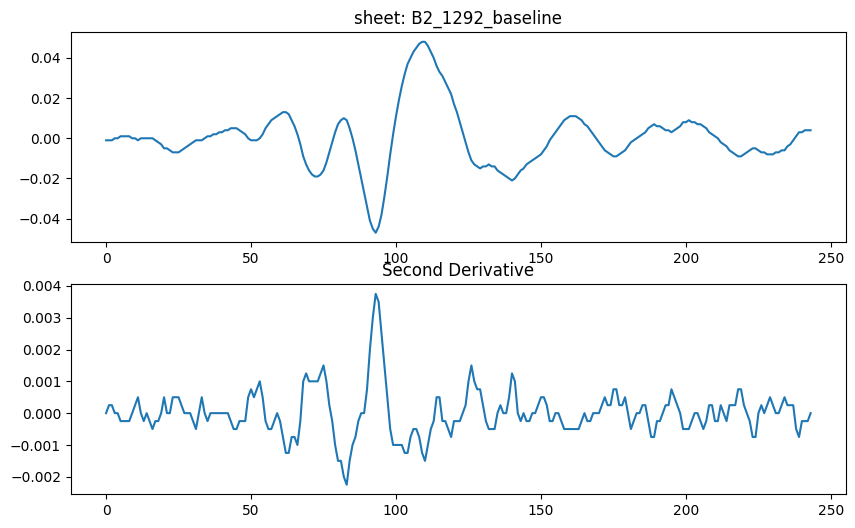

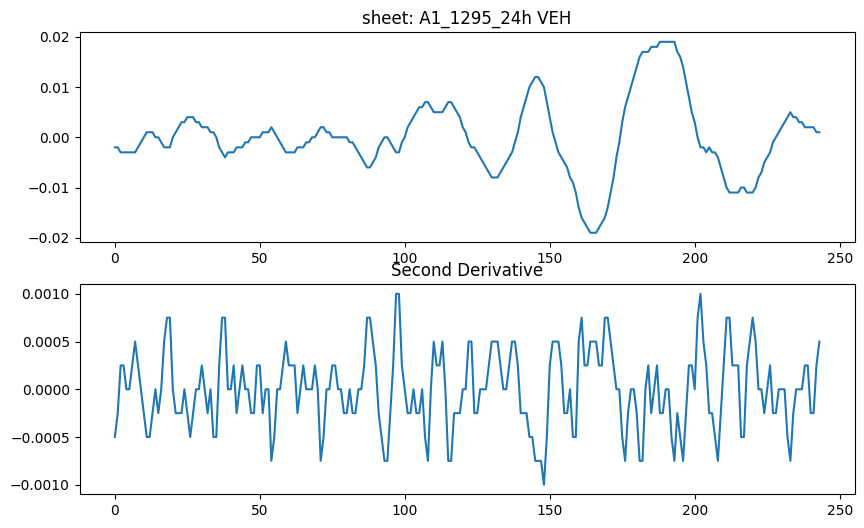

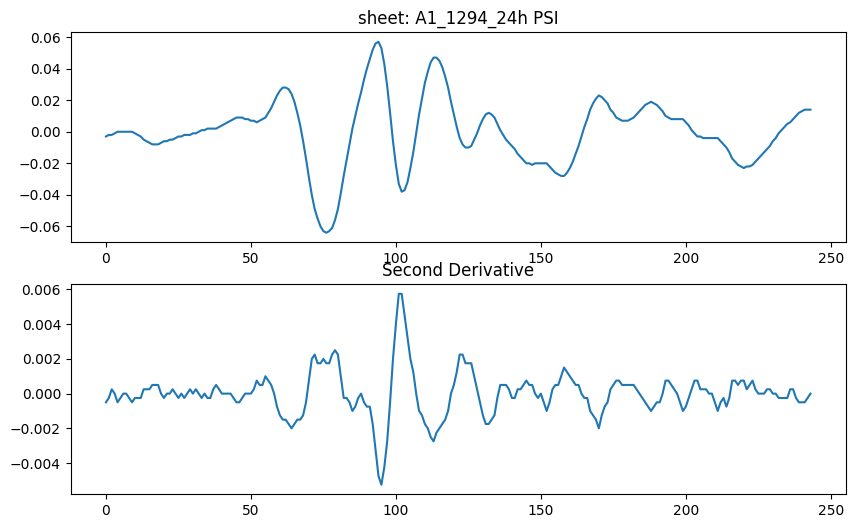

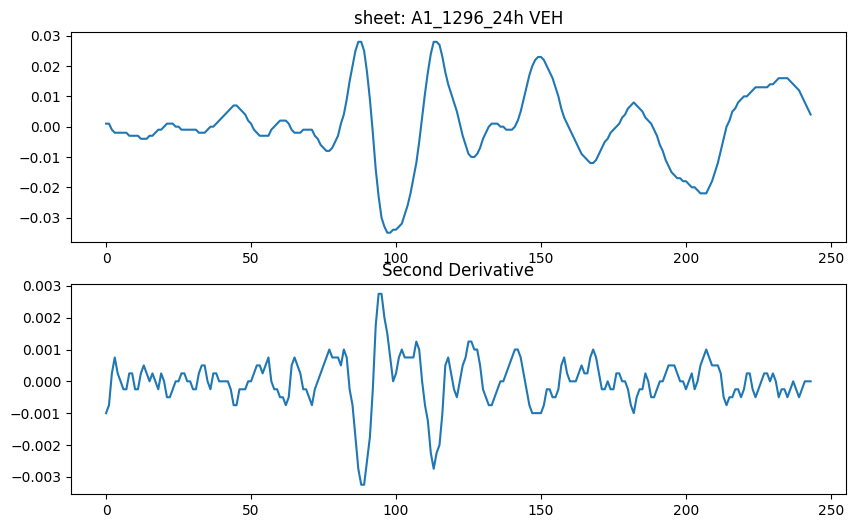

In [10]:
for filename, df in dataframes.items():
    khz = df[df['Freq(Hz)'] == 8000]
    dbkhz = khz[khz['Level(dB)'] == 90]
    index = dbkhz.index.values[0]
    final = df.iloc[index,48:]
    final = pd.to_numeric(final, errors='coerce')
    x = final.index.values[:-1].astype(int)
    dy_dx = np.gradient(final[:-1], final.index.values[:-1].astype(int))

    # Calculate the second derivative
    d2y_dx2 = np.gradient(dy_dx, final.index.values[:-1].astype(int))

    # Plot the original data and the second derivative
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(x, final[:-1], label='Original Data')
    plt.title(f'sheet: {filename}')

    #plt.subplot(2, 1, 2)
    #plt.plot(x, dy_dx, label='First Derivative')
    #plt.title('First Derivative')

    plt.subplot(2, 1, 2)
    plt.plot(x, d2y_dx2, label='Second Derivative')
    plt.title('Second Derivative')

# Clustering

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

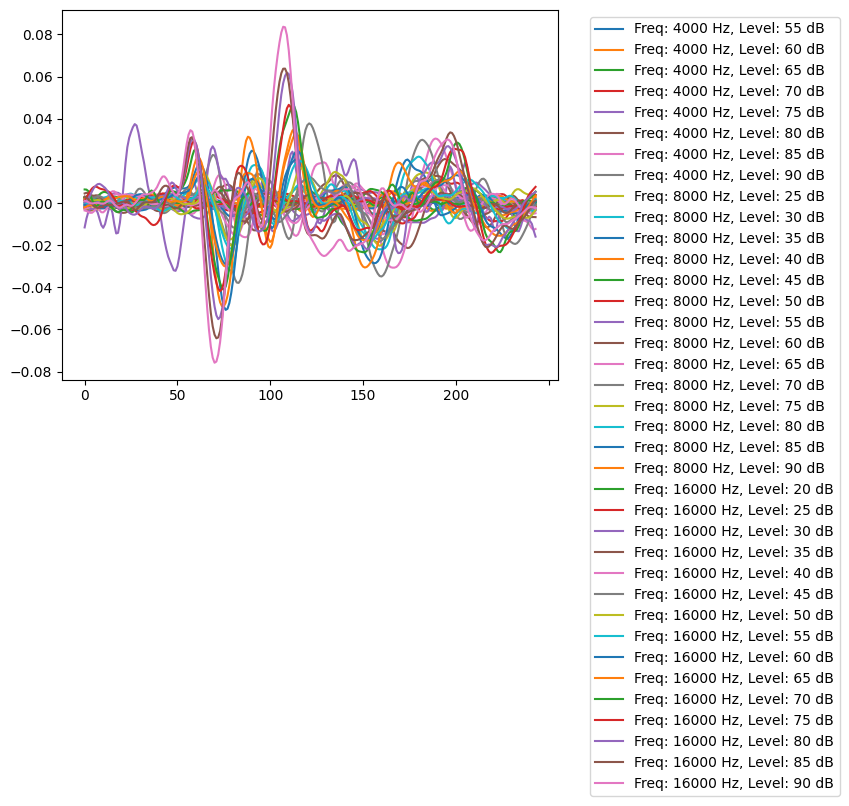

In [72]:
#plot all waves for one rat


plt.figure()
df = list(dataframes.values())[0]  # get the first rat data

for khz_value in range(1000, 17000, 1000):
    for dbkhz_value in range(0, 95, 5):
        khz = df[df['Freq(Hz)'] == khz_value]
        dbkhz = khz[khz['Level(dB)'] == dbkhz_value]
        if not dbkhz.empty:
            index = dbkhz.index.values[0]
            final = df.iloc[index,48:]
            final = pd.to_numeric(final, errors='coerce')
            final.plot(label=f'Freq: {khz_value} Hz, Level: {dbkhz_value} dB')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [75]:
# store waves as a list of lists

waves = []

df = list(dataframes.values())[0]  # get the first rat data

for khz_value in range(1000, 17000, 1000):
    for dbkhz_value in range(0, 95, 5):
        khz = df[df['Freq(Hz)'] == khz_value]
        dbkhz = khz[khz['Level(dB)'] == dbkhz_value]
        if not dbkhz.empty:
            index = dbkhz.index.values[0]
            final = df.iloc[index,48:]
            final = pd.to_numeric(final, errors='coerce')
            waves.append(final.tolist())

# Remove the last element from each list in waves because they are nan
waves = [wave[:-1] for wave in waves]

In [76]:
from sklearn.cluster import KMeans
import numpy as np

data = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
numpy_data = np.array(data)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(numpy_data)
print(kmeans.labels_)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'